In [1]:
#import all of the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Display large numbers without scientific notation
pd.set_option('display.float_format', '{:,.0f}'.format)

In [3]:
#Import the dataset into a dataframe
df = pd.read_csv('Walmart_Sales.csv')

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,691",0,42,3,211,8
1,1,12-02-2010,"1,641,957",1,39,3,211,8
2,1,19-02-2010,"1,611,968",0,40,3,211,8
3,1,26-02-2010,"1,409,728",0,47,3,211,8
4,1,05-03-2010,"1,554,807",0,46,3,211,8
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,"713,174",0,65,4,192,9
6431,45,05-10-2012,"733,455",0,65,4,192,9
6432,45,12-10-2012,"734,464",0,54,4,192,9
6433,45,19-10-2012,"718,126",0,56,4,192,9


In [5]:
#DATA PREPROCESSING

In [6]:
#Check for missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
#Check for any duplicate rows that might be inserted
df.duplicated().sum()

0

In [8]:
#Check the data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
#Convert date to a datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [10]:
#Check to see if it worked (it did)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [11]:
#DATA EXPLORATION

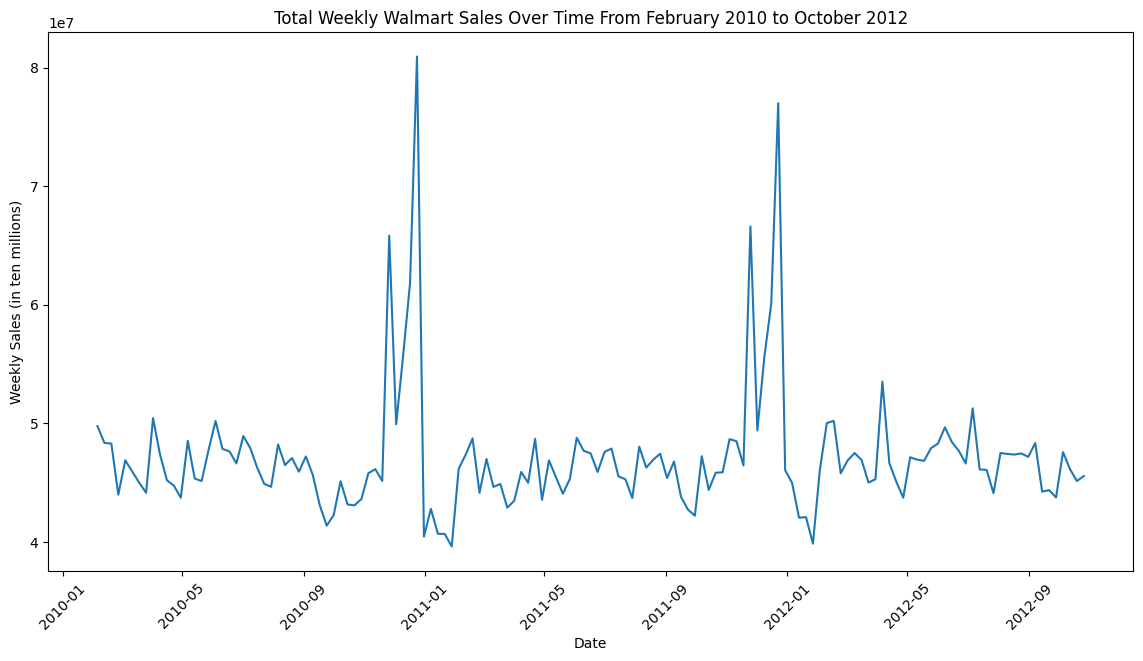

In [12]:
#Let's look at the weekly sales over time by plotting it

#Add up the total weekly sales with its respective date/week
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()


plt.figure(figsize=(14,7))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.xlabel('Date')

plt.xticks(rotation=45)

plt.ylabel('Weekly Sales (in ten millions)')
plt.title('Total Weekly Walmart Sales Over Time From February 2010 to October 2012')
plt.show()

In [13]:
#Weekly sales from around October-early January spike up, this in large part due to the holiday season (Valentines, Thanksgiving, Christmas, Black Friday)
#Let's look at, on average, how much Walmart makes during the holiday weeks compared to non-holiday
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()


Holiday_Flag
0   1,041,256
1   1,122,888
Name: Weekly_Sales, dtype: float64

In [14]:
df[df['Holiday_Flag'] == 1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,"1,641,957",1,39,3,211,8
31,1,2010-09-10,"1,507,461",1,79,3,211,8
42,1,2010-11-26,"1,955,624",1,65,3,212,8
47,1,2010-12-31,"1,367,320",1,48,3,211,8
53,1,2011-02-11,"1,649,615",1,36,3,213,8
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,"746,130",1,71,4,187,9
6386,45,2011-11-25,"1,170,673",1,49,3,188,9
6391,45,2011-12-30,"869,404",1,38,3,189,9
6397,45,2012-02-10,"803,657",1,37,4,190,8


In [15]:
df[df['Holiday_Flag'] == 0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,"1,643,691",0,42,3,211,8
2,1,2010-02-19,"1,611,968",0,40,3,211,8
3,1,2010-02-26,"1,409,728",0,47,3,211,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8
5,1,2010-03-12,"1,439,542",0,58,3,211,8
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,"713,174",0,65,4,192,9
6431,45,2012-10-05,"733,455",0,65,4,192,9
6432,45,2012-10-12,"734,464",0,54,4,192,9
6433,45,2012-10-19,"718,126",0,56,4,192,9


In [16]:
#Despite making up just 7.5% of the data, the holiday weeks on average make $81,632 more than the non-holiday weeks, which is a 7.8% increase

In [17]:
#Let's look at which stores are performing the best and which stores are performing the worse
store_performance = df.groupby('Store')['Weekly_Sales'].mean()
store_performance = store_performance.sort_values(ascending=False)


In [18]:
#Fifteen best performing stores
store_performance.head(15)

Store
20   2,107,677
4    2,094,713
14   2,020,978
13   2,003,620
2    1,925,751
10   1,899,425
27   1,775,216
6    1,564,728
1    1,555,264
39   1,450,668
19   1,444,999
31   1,395,901
23   1,389,864
24   1,356,755
11   1,356,383
Name: Weekly_Sales, dtype: float64

In [19]:
#Stores in the middle of the pack performance-wise
store_performance[15:30]

Store
28   1,323,522
41   1,268,125
32   1,166,568
18   1,084,718
22   1,028,501
12   1,009,002
26   1,002,912
34     966,782
40     964,128
35     919,725
8      908,750
17     893,581
45     785,981
21     756,069
25     706,722
Name: Weekly_Sales, dtype: float64

In [20]:
#Fifteen worst performing stores
store_performance.tail(15)

Store
43   633,325
15   623,312
7    570,617
42   556,404
9    543,981
29   539,451
16   519,248
37   518,900
30   438,580
3    402,704
38   385,732
36   373,512
5    318,012
44   302,749
33   259,862
Name: Weekly_Sales, dtype: float64

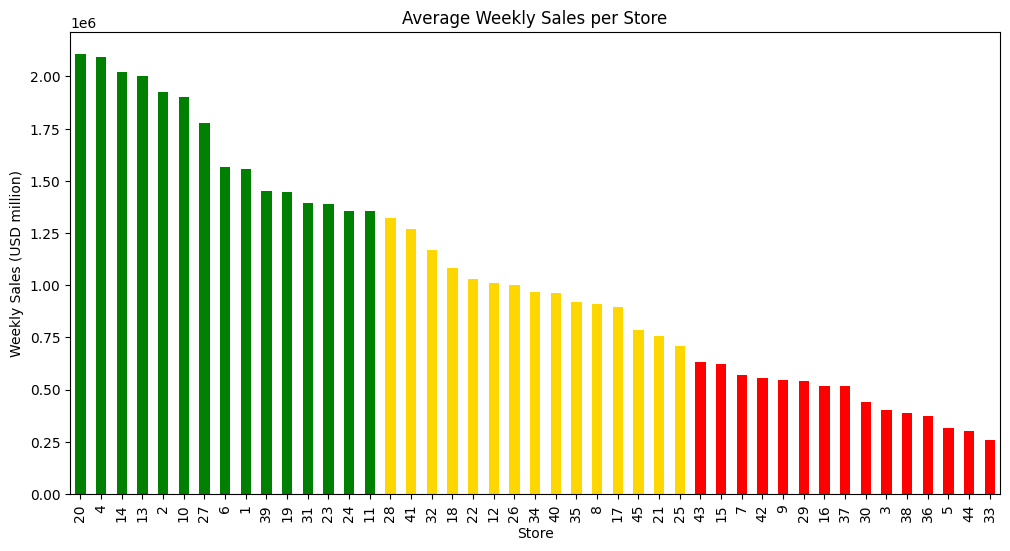

In [21]:
#Visualizing with a graph to see which stores dominate revenue
#Color code based on performance (green= T15, gold= M15, red=B15)

T15= store_performance.head(15)
M15= store_performance[15:30]
B15= store_performance.tail(15)

color_code=['green']*15 + ['gold']*15 + ['red']*15
overall = pd.concat([T15, M15, B15])

plt.figure(figsize=(12,6))
overall.plot(kind='bar',color=color_code)
plt.xlabel('Store')
plt.ylabel('Weekly Sales (USD million)')
plt.title('Average Weekly Sales per Store')
plt.show()


In [22]:
#What makes 20, 4, 14, 13, 2 so good?
#Why are 38, 36, 5, 44, 33 underachieving?

#A new DataFrame containing the 15 best performing stores
df_T15 = df[df['Store'].isin(T15.index)]
df_T15

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,"1,643,691",0,42,3,211,8
1,1,2010-02-12,"1,641,957",1,39,3,211,8
2,1,2010-02-19,"1,611,968",0,40,3,211,8
3,1,2010-02-26,"1,409,728",0,47,3,211,8
4,1,2010-03-05,"1,554,807",0,46,3,211,8
...,...,...,...,...,...,...,...,...
5572,39,2012-09-28,"1,495,607",0,78,4,222,7
5573,39,2012-10-05,"1,574,409",0,72,4,222,6
5574,39,2012-10-12,"1,494,417",0,70,4,222,6
5575,39,2012-10-19,"1,577,486",0,71,4,222,6


In [23]:
#A new DataFrame containing the 15 worst performing stores
df_B15 =  df[df['Store'].isin(B15.index)]
df_B15

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
286,3,2010-02-05,"461,622",0,46,3,214,7
287,3,2010-02-12,"420,729",1,48,3,215,7
288,3,2010-02-19,"421,642",0,47,3,215,7
289,3,2010-02-26,"407,205",0,52,3,215,7
290,3,2010-03-05,"415,202",0,53,3,215,7
...,...,...,...,...,...,...,...,...
6287,44,2012-09-28,"355,308",0,65,4,131,5
6288,44,2012-10-05,"337,390",0,62,4,131,5
6289,44,2012-10-12,"337,796",0,55,4,131,5
6290,44,2012-10-19,"323,767",0,52,4,131,5


In [24]:
df_T15[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']].mean()

Temperature           62
Fuel_Price             3
CPI                  175
Unemployment           7
Weekly_Sales   1,689,463
dtype: float64

In [25]:
df_B15[['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']].mean()

Temperature         64
Fuel_Price           3
CPI                179
Unemployment         8
Weekly_Sales   465,759
dtype: float64

In [26]:
#So the T15 performing stores have a lower CPI (less inflation, more purchasing power) than the B15 stores
#The T15 stores also have a lower unemployment rate (better economy and stronger labor market, even it is by just 1%)
#Temperature and fuel price are irrelevant in this case

<Axes: >

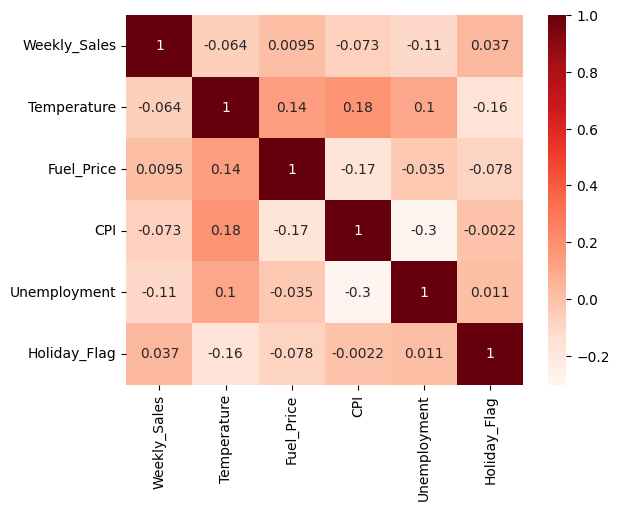

In [27]:
#Finding the correlations between certain features and whether they affect weekly sales
correlations = df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment', 'Holiday_Flag']].corr()

#Using a heatmap to visualize said correlation(s)
sns.heatmap(correlations, annot=True, cmap='Reds')


In [28]:
#No strong relationships between any of the features together
#The most positive (CPI/Temperature) being at 0.18, very weak regardless
#The weakest (Weekly_Sales/Unemployment) being a -0.11

In [44]:
#Hypothetically if we were still in October 2012, how could we use this to predict future weekly sales 
#We will machine learning to predict weekly sales (y) using certain features that influence sales (X)

#import all necessary libraries for training and testing model using Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = df[['Store','Holiday_Flag','CPI', 'Unemployment']]
y = df['Weekly_Sales']

#20% of data will be used testing, remaining 80% will be for training
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=42)

#Print out the exact distributions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5148, 4)
(1287, 4)
(5148,)
(1287,)


In [45]:
#Creating the Random Forest Regression model
WalmartRF= RandomForestRegressor(random_state=42)

#Training the Random Forest Regression model
WalmartRF.fit(X_train, y_train)

WalmartRF_Prediction = WalmartRF.predict(X_test)

print("MAE:", mean_absolute_error(y_test, WalmartRF_Prediction))
print("R²:", r2_score(y_test, WalmartRF_Prediction))

MAE: 79192.24412408701
R²: 0.9301743971974165


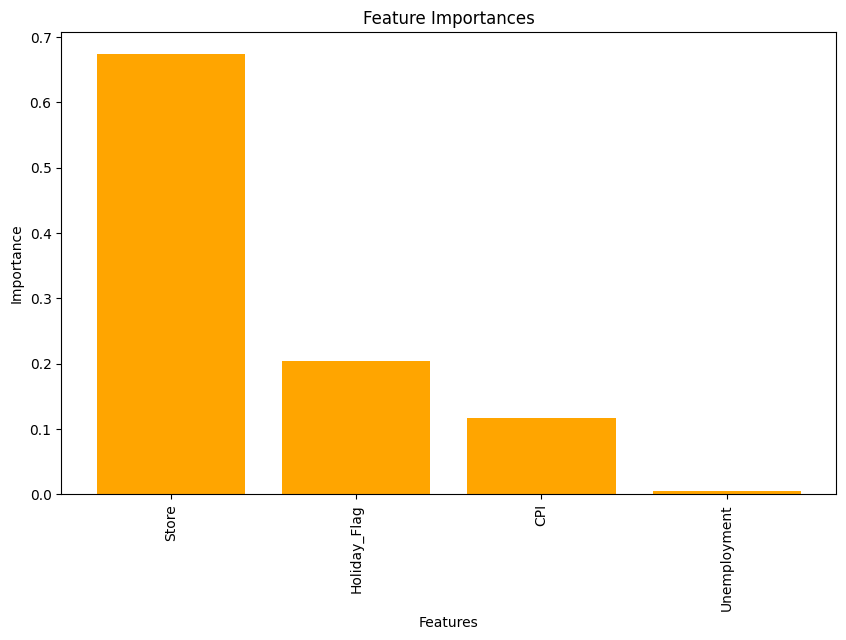

In [48]:
#Plotting a feature importance graph to see how much each features factored into predictions
importances = WalmartRF.feature_importances_

#Have the features of importance shown in descending order
features = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = X_train.columns

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[features], color='orange')
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
'''Exploratory analysis showed that store-level factors dominated weekly sales variation, while temperature and fuel price had minimal impact. 
Encoding store identity significantly improved predictive performance, increasing R² from 0.11 to 0.93.'''